# import libraries

In [1]:
# IMPORT REQUIRED PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "white")

# Classification algorithms

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC

In [3]:
train = pd.read_csv("final_train.csv")

In [4]:
y = train.Outcome
X = train.drop("Outcome", axis = 1)

# Check cross validation scores with different algorithms

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
all_scores = {}

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [24]:
names = ["LR", "DT", "KNN", "NB", "SVC"]
clfs = [LogisticRegression(max_iter = 400), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(max_depth = 5), LinearSVC(max_iter = 3000)]

In [25]:
for clf, name in zip(clfs, names):
    scores = cross_val_score(clf, X_scaled, y, cv = 10)
    print(scores)
    print(f"{name} = {scores.mean()*100:0.2f}")
    all_scores[name] = (scores.mean() * 100)

[0.72727273 0.76623377 0.79220779 0.7012987  0.76623377 0.77922078
 0.79220779 0.79220779 0.72368421 0.82894737]
LR = 76.70
[0.68831169 0.76623377 0.71428571 0.68831169 0.71428571 0.7012987
 0.75324675 0.76623377 0.67105263 0.77631579]
DT = 72.40
[0.74025974 0.72727273 0.75324675 0.68831169 0.71428571 0.77922078
 0.72727273 0.81818182 0.72368421 0.77631579]
KNN = 74.48
[0.66233766 0.74025974 0.72727273 0.64935065 0.71428571 0.74025974
 0.75324675 0.76623377 0.72368421 0.77631579]
NB = 72.53
[0.72727273 0.76623377 0.76623377 0.71428571 0.76623377 0.76623377
 0.79220779 0.79220779 0.72368421 0.84210526]
SVC = 76.57


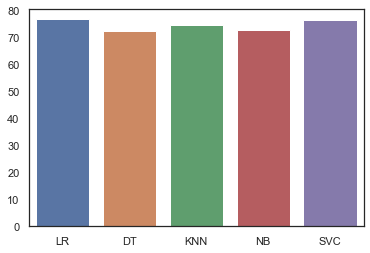

In [41]:
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))

# Logistic Regression with built-in cross validation

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 9), (192, 9), (576,), (192,))

In [46]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv = 5).fit(X_train, y_train)

In [48]:
score = clf.score(X_train, y_train)
print(f"Accuracy score  :", score)

Accuracy score  : 0.7690972222222222


In [49]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv = 10, max_iter = 500).fit(X_train, y_train)

In [50]:
score = clf.score(X_train, y_train)
print(f"Accuracy score  :", score)

Accuracy score  : 0.7690972222222222


# Testing with test data

In [51]:
y_pred = clf.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.765625

In [54]:
confusion_matrix(y_test, y_pred)

array([[122,  11],
       [ 34,  25]], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       133
           1       0.69      0.42      0.53        59

    accuracy                           0.77       192
   macro avg       0.74      0.67      0.69       192
weighted avg       0.76      0.77      0.75       192

